# ETL Básico - Mi Primer Pipeline de Datos

**¡Bienvenidos a su primera experiencia con ETL!**

## ¿Qué es ETL?
- **E**xtract (Extraer): Obtener datos de una fuente (archivos CSV, bases de datos, APIs)
- **T**ransform (Transformar): Limpiar y procesar los datos
- **L**oad (Cargar): Guardar los datos procesados

## Objetivo del laboratorio:
Trabajaremos con datos reales de estudiantes universitarios almacenados en archivos CSV para aprender los conceptos básicos de pandas y manipulación de datos.

## Datos que usaremos:
- **datos_estudiantes.csv**: Información básica de estudiantes (ID, nombre, edad, programa, semestre, ciudad)
- **notas_estudiantes.csv**: Calificaciones de diferentes materias (matemáticas, programación, inglés, física)

## Archivos necesarios:
Asegúrate de tener estos archivos en la misma carpeta que este notebook:
- `datos_estudiantes.csv`
- `notas_estudiantes.csv`

## Lo que aprenderás:
- Cargar datos desde archivos CSV
- Explorar y validar datos
- Combinar múltiples fuentes de datos
- Crear métricas y reportes
- Guardar resultados procesados

## Paso 1: EXTRACT - Extracción de Datos

En esta fase vamos a **extraer datos** de archivos CSV. Esto simula cómo trabajarías con datos reales en un proyecto profesional.

### Lo que haremos:
1. **Importar librerías** necesarias para el análisis
2. **Cargar archivo de estudiantes** (`datos_estudiantes.csv`)
3. **Cargar archivo de notas** (`notas_estudiantes.csv`)  
4. **Validar** que los datos se cargaron correctamente

### Conceptos clave:
- `pd.read_csv()`: Función para leer archivos CSV
- `DataFrame`: Estructura de datos principal de pandas
- Validación de integridad de datos

In [ ]:
# 1.1 Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date

print(" Librerías importadas correctamente")
print(f" Fecha de hoy: {date.today()}")

 Librerías importadas correctamente
 Fecha de hoy: 2025-09-04


In [15]:
# 1.2 Cargar datos de estudiantes desde archivo CSV
# Esto simula extraer datos de una fuente real como una base de datos o sistema

print(" Cargando datos de estudiantes desde archivo CSV...")

# Verificar si el archivo existe
import os
archivo_estudiantes = 'datos_estudiantes.csv'

if os.path.exists(archivo_estudiantes):
    # Cargar el DataFrame desde el archivo CSV
    df_estudiantes = pd.read_csv(archivo_estudiantes, encoding='utf-8')
    
    print(" Archivo cargado exitosamente")
    print(f" Datos de estudiantes cargados:")
    print(f"   • Total de estudiantes: {len(df_estudiantes)}")
    print(f"   • Columnas: {list(df_estudiantes.columns)}")
    
    # Mostrar información básica del archivo
    tamaño_archivo = os.path.getsize(archivo_estudiantes) / 1024  # en KB
    print(f"   • Tamaño del archivo: {tamaño_archivo:.1f} KB")
    
    # Mostrar los primeros 5 estudiantes
    print("\n Primeros 5 estudiantes:")
    print(df_estudiantes.head())
    
    # Mostrar información adicional
    print(f"\n Información adicional:")
    print(f"   • Programas únicos: {df_estudiantes['Programa'].nunique()}")
    print(f"   • Ciudades únicas: {df_estudiantes['Ciudad'].nunique()}")
    print(f"   • Rango de edades: {df_estudiantes['Edad'].min()} - {df_estudiantes['Edad'].max()} años")
    
else:
    print(f" Error: No se encuentra el archivo '{archivo_estudiantes}'")
    print("    Asegúrate de que el archivo esté en la misma carpeta que este notebook")

 Cargando datos de estudiantes desde archivo CSV...
 Archivo cargado exitosamente
 Datos de estudiantes cargados:
   • Total de estudiantes: 15
   • Columnas: ['ID', 'Nombre', 'Edad', 'Programa', 'Semestre', 'Ciudad']
   • Tamaño del archivo: 0.7 KB

 Primeros 5 estudiantes:
     ID           Nombre  Edad        Programa  Semestre    Ciudad
0  1001       Ana García    19      Ingeniería         3      Cali
1  1002     Carlos López    20  Administración         5    Bogotá
2  1003  María Rodríguez    18      Ingeniería         2      Cali
3  1004      José Martín    21        Medicina         7  Medellín
4  1005    Laura Sánchez    19      Psicología         4      Cali

 Información adicional:
   • Programas únicos: 5
   • Ciudades únicas: 5
   • Rango de edades: 18 - 22 años


In [19]:
# 1.3 Cargar datos de notas desde archivo CSV
# Simulamos extraer notas de otro sistema o base de datos

print(" Cargando datos de notas desde archivo CSV...")

# Verificar si el archivo existe
archivo_notas = 'notas_estudiantes.csv'

if os.path.exists(archivo_notas):
    # Cargar el DataFrame desde el archivo CSV
    df_notas = pd.read_csv(archivo_notas, encoding='utf-8')
    
    print(" Archivo de notas cargado exitosamente")
    
    # Obtener lista de materias (todas las columnas excepto ID)
    materias = [col for col in df_notas.columns if col != 'ID']
    
    print(f" Datos de notas cargados:")
    print(f"   • Total de registros: {len(df_notas)}")
    print(f"   • Materias evaluadas: {materias}")
    # Operaciones min() y max() encadenadas || Primera .min(): Calcula el valor mínimo de cada columna (materia) || Segunda .min(): Encuentra el mínimo global entre todos esos mínimos
    print(f"   • Rango de notas: {df_notas[materias].min().min():.1f} - {df_notas[materias].max().max():.1f}")
    
    # Mostrar información básica del archivo
    tamaño_archivo = os.path.getsize(archivo_notas) / 1024  # en KB
    print(f"   • Tamaño del archivo: {tamaño_archivo:.1f} KB")
    
    # Mostrar las primeras 5 notas
    print("\n Primeras 5 notas:")
    print(df_notas.head())
    
    # Estadísticas básicas por materia
    print(f"\n Promedio por materia:")
    for materia in materias:
        promedio = df_notas[materia].mean()
        print(f"  {materia}: {promedio:.2f}")
        
else:
    print(f" Error: No se encuentra el archivo '{archivo_notas}'")
    print("   Asegúrate de que el archivo esté en la misma carpeta que este notebook")

 Cargando datos de notas desde archivo CSV...
 Archivo de notas cargado exitosamente
 Datos de notas cargados:
   • Total de registros: 15
   • Materias evaluadas: ['Matematicas', 'Programacion', 'Ingles', 'Fisica']
   • Rango de notas: 2.8 - 4.8
   • Tamaño del archivo: 0.3 KB

 Primeras 5 notas:
     ID  Matematicas  Programacion  Ingles  Fisica
0  1001          3.8           4.2     4.1     3.5
1  1002          3.2           3.9     4.3     2.8
2  1003          4.1           4.5     3.9     3.7
3  1004          2.9           3.1     4.2     3.4
4  1005          3.6           3.8     4.5     3.2

 Promedio por materia:
  Matematicas: 3.66
  Programacion: 3.89
  Ingles: 4.11
  Fisica: 3.53


In [22]:
# 1.4 Validación de datos cargados
print(" VALIDACIÓN DE DATOS CARGADOS")
print("=" * 40)

# Verificar que ambos DataFrames fueron cargados correctamente
try:
    print(" Verificando datos de estudiantes:")
    print(f"    Filas: {df_estudiantes.shape[0]}")
    print(f"    Columnas: {df_estudiantes.shape[1]}")
    print(f"    Columnas disponibles: {list(df_estudiantes.columns)}")
    
    print("\n Verificando datos de notas:")
    print(f"    Filas: {df_notas.shape[0]}")
    print(f"    Columnas: {df_notas.shape[1]}")
    print(f"    Columnas disponibles: {list(df_notas.columns)}")
    
    # Verificar que los IDs coincidan entre ambos archivos
    ids_estudiantes = set(df_estudiantes['ID'])
    ids_notas = set(df_notas['ID'])
    
    if ids_estudiantes == ids_notas:
        print(f"\n Los IDs coinciden perfectamente entre ambos archivos")
        print(f"    Total de estudiantes con datos completos: {len(ids_estudiantes)}")
    else:
        print(f"\n  Advertencia: Los IDs no coinciden completamente")
        print(f"    IDs solo en estudiantes: {ids_estudiantes - ids_notas}")
        print(f"    IDs solo en notas: {ids_notas - ids_estudiantes}")
        print(f"    IDs en común: {len(ids_estudiantes & ids_notas)}")
        
    print(f"\n Datos listos para la fase de transformación")
    
except NameError as e:
    print(f" Error: No se pudieron cargar todos los datos necesarios")
    print(f"   Detalle: {str(e)}")
    print("  Asegúrate de ejecutar las celdas anteriores primero")

 VALIDACIÓN DE DATOS CARGADOS
 Verificando datos de estudiantes:
    Filas: 15
    Columnas: 6
    Columnas disponibles: ['ID', 'Nombre', 'Edad', 'Programa', 'Semestre', 'Ciudad']

 Verificando datos de notas:
    Filas: 15
    Columnas: 5
    Columnas disponibles: ['ID', 'Matematicas', 'Programacion', 'Ingles', 'Fisica']

 Los IDs coinciden perfectamente entre ambos archivos
    Total de estudiantes con datos completos: 15

 Datos listos para la fase de transformación


## Paso 2: TRANSFORM - Transformación de Datos

Ahora vamos a **limpiar** y **procesar** nuestros datos para prepararlos para el análisis.

In [23]:
# 2.1 Explorar los datos que tenemos
print(" EXPLORACIÓN DE DATOS")
print("=" * 40)

# Información básica del DataFrame de estudiantes
print(" Información de estudiantes:")
print(f"   * Filas: {df_estudiantes.shape[0]}")
print(f"   * Columnas: {df_estudiantes.shape[1]}")
print(f"   * Programas únicos: {df_estudiantes['Programa'].unique()}")
print(f"   * Ciudades únicas: {df_estudiantes['Ciudad'].unique()}")

# Información básica del DataFrame de notas
print("\n Información de notas:")
print(f"   * Filas: {df_notas.shape[0]}")
print(f"   * Columnas: {df_notas.shape[1]}")

# Verificar si hay valores nulos (datos faltantes)
print("\n Valores nulos en estudiantes:")
print(df_estudiantes.isnull().sum())

print("\n Valores nulos en notas:")
print(df_notas.isnull().sum())

 EXPLORACIÓN DE DATOS
 Información de estudiantes:
   * Filas: 15
   * Columnas: 6
   * Programas únicos: ['Ingeniería' 'Administración' 'Medicina' 'Psicología' 'Derecho']
   * Ciudades únicas: ['Cali' 'Bogotá' 'Medellín' 'Cartagena' 'Barranquilla']

 Información de notas:
   * Filas: 15
   * Columnas: 5

 Valores nulos en estudiantes:
ID          0
Nombre      0
Edad        0
Programa    0
Semestre    0
Ciudad      0
dtype: int64

 Valores nulos en notas:
ID              0
Matematicas     0
Programacion    0
Ingles          0
Fisica          0
dtype: int64


In [24]:
# 2.2 Combinar (unir) los dos DataFrames
# Esto es como hacer un JOIN en SQL

print(" COMBINANDO DATOS DE ESTUDIANTES Y NOTAS")
print("=" * 50)

# Unir por la columna 'ID' (clave común)
df_completo = pd.merge(df_estudiantes, df_notas, on='ID', how='inner')

print(f" DataFrames combinados exitosamente")
print(f"   * Estudiantes originales: {len(df_estudiantes)}")
print(f"   * Notas originales: {len(df_notas)}")
print(f"   * Registros combinados: {len(df_completo)}")
print(f"   * Total de columnas: {len(df_completo.columns)}")

# Mostrar una muestra del DataFrame combinado
print("\n Muestra de datos combinados:")
print(df_completo.head(3))

 COMBINANDO DATOS DE ESTUDIANTES Y NOTAS
 DataFrames combinados exitosamente
   * Estudiantes originales: 15
   * Notas originales: 15
   * Registros combinados: 15
   * Total de columnas: 10

 Muestra de datos combinados:
     ID           Nombre  Edad        Programa  Semestre  Ciudad  Matematicas  \
0  1001       Ana García    19      Ingeniería         3    Cali          3.8   
1  1002     Carlos López    20  Administración         5  Bogotá          3.2   
2  1003  María Rodríguez    18      Ingeniería         2    Cali          4.1   

   Programacion  Ingles  Fisica  
0           4.2     4.1     3.5  
1           3.9     4.3     2.8  
2           4.5     3.9     3.7  


In [25]:
# 2.3 Crear nuevas columnas (métricas calculadas)
print(" CREANDO NUEVAS MÉTRICAS")
print("=" * 35)

# 1. Calcular promedio de notas para cada estudiante
materias = ['Matematicas', 'Programacion', 'Ingles', 'Fisica']
df_completo['Promedio'] = df_completo[materias].mean(axis=1).round(2)
print(" Promedio de notas calculado")

# 2. Clasificar estudiantes según su promedio
def clasificar_rendimiento(promedio):
    if promedio >= 4.5:
        return 'Excelente'
    elif promedio >= 4.0:
        return 'Sobresaliente'
    elif promedio >= 3.5:
        return 'Bueno'
    elif promedio >= 3.0:
        return 'Aceptable'
    else:
        return 'Debe mejorar'

df_completo['Rendimiento'] = df_completo['Promedio'].apply(clasificar_rendimiento)
print(" Clasificación de rendimiento creada")

# 3. Identificar la materia con mejor y peor nota para cada estudiante
df_completo['Mejor_Materia'] = df_completo[materias].idxmax(axis=1)
df_completo['Peor_Materia'] = df_completo[materias].idxmin(axis=1)
print(" Mejor y peor materia identificadas")

# 4. Crear indicador de estudiante local (de Cali)
df_completo['Es_Local'] = df_completo['Ciudad'] == 'Cali'
print(" Indicador de estudiante local creado")

# Mostrar las nuevas columnas
nuevas_columnas = ['Promedio', 'Rendimiento', 'Mejor_Materia', 'Peor_Materia', 'Es_Local']
print(f"\n Nuevas columnas creadas: {nuevas_columnas}")

# Mostrar muestra con las nuevas columnas
print("\n Muestra con nuevas métricas:")
columnas_mostrar = ['Nombre', 'Programa', 'Promedio', 'Rendimiento', 'Mejor_Materia']
print(df_completo[columnas_mostrar].head())

 CREANDO NUEVAS MÉTRICAS
 Promedio de notas calculado
 Clasificación de rendimiento creada
 Mejor y peor materia identificadas
 Indicador de estudiante local creado

 Nuevas columnas creadas: ['Promedio', 'Rendimiento', 'Mejor_Materia', 'Peor_Materia', 'Es_Local']

 Muestra con nuevas métricas:
            Nombre        Programa  Promedio    Rendimiento Mejor_Materia
0       Ana García      Ingeniería      3.90          Bueno  Programacion
1     Carlos López  Administración      3.55          Bueno        Ingles
2  María Rodríguez      Ingeniería      4.05  Sobresaliente  Programacion
3      José Martín        Medicina      3.40      Aceptable        Ingles
4    Laura Sánchez      Psicología      3.78          Bueno        Ingles


## Paso 3: LOAD - Carga de Datos

Finalmente, vamos a **guardar** nuestros datos procesados y crear algunos **reportes útiles**.

In [ ]:
# 3.1 Guardar el dataset completo procesado
import os

print("GUARDANDO DATOS PROCESADOS")
print("=" * 35)

# Crear carpeta para los resultados
carpeta_resultados = 'resultados_etl_basico'
os.makedirs(carpeta_resultados, exist_ok=True)
print(f"Carpeta creada: {carpeta_resultados}")

# Guardar dataset completo
archivo_completo = os.path.join(carpeta_resultados, 'estudiantes_completo.csv')
df_completo.to_csv(archivo_completo, index=False, encoding='utf-8')
print(f"Dataset completo guardado: {archivo_completo}")

# Mostrar información del archivo guardado
tamaño_archivo = os.path.getsize(archivo_completo) / 1024  # en KB
print(f"   • Registros guardados: {len(df_completo)}")
print(f"   • Columnas guardadas: {len(df_completo.columns)}")
print(f"   • Tamaño del archivo: {tamaño_archivo:.1f} KB")

💾 GUARDANDO DATOS PROCESADOS
📁 Carpeta creada: resultados_etl_basico
✅ Dataset completo guardado: resultados_etl_basico/estudiantes_completo.csv
   • Registros guardados: 15
   • Columnas guardadas: 15
   • Tamaño del archivo: 1.6 KB


In [ ]:
# 3.2 Crear reportes resumidos
print("CREANDO REPORTES RESUMIDOS")
print("=" * 35)

# Reporte 1: Resumen por programa
reporte_programa = df_completo.groupby('Programa').agg({
    'ID': 'count',  # Contar estudiantes
    'Promedio': ['mean', 'min', 'max'],  # Estadísticas del promedio
    'Edad': 'mean'  # Edad promedio
}).round(2)

# Simplificar nombres de columnas
reporte_programa.columns = ['Num_Estudiantes', 'Promedio_Gral', 'Promedio_Min', 'Promedio_Max', 'Edad_Promedio']
reporte_programa = reporte_programa.reset_index()

# Guardar reporte por programa
archivo_programa = os.path.join(carpeta_resultados, 'reporte_por_programa.csv')
reporte_programa.to_csv(archivo_programa, index=False, encoding='utf-8')
print(f"Reporte por programa guardado: {archivo_programa}")

# Mostrar reporte por programa
print("\nResumen por Programa Académico:")
print(reporte_programa)

# Reporte 2: Resumen por ciudad
reporte_ciudad = df_completo.groupby('Ciudad').agg({
    'ID': 'count',
    'Promedio': 'mean'
}).round(2)
reporte_ciudad.columns = ['Num_Estudiantes', 'Promedio_Ciudad']
reporte_ciudad = reporte_ciudad.reset_index()

# Guardar reporte por ciudad
archivo_ciudad = os.path.join(carpeta_resultados, 'reporte_por_ciudad.csv')
reporte_ciudad.to_csv(archivo_ciudad, index=False, encoding='utf-8')
print(f"\nReporte por ciudad guardado: {archivo_ciudad}")

# Mostrar reporte por ciudad
print("\nResumen por Ciudad:")
print(reporte_ciudad)

📊 CREANDO REPORTES RESUMIDOS
✅ Reporte por programa guardado: resultados_etl_basico/reporte_por_programa.csv

📋 Resumen por Programa Académico:
         Programa  Num_Estudiantes  Promedio_Gral  Promedio_Min  Promedio_Max  \
0  Administración                3           3.56          3.30          3.82   
1         Derecho                2           3.58          3.50          3.65   
2      Ingeniería                5           4.15          3.90          4.35   
3        Medicina                3           3.75          3.40          3.95   
4      Psicología                2           3.58          3.38          3.78   

   Edad_Promedio  
0          19.67  
1          20.50  
2          18.80  
3          21.00  
4          20.00  

✅ Reporte por ciudad guardado: resultados_etl_basico/reporte_por_ciudad.csv

📋 Resumen por Ciudad:
         Ciudad  Num_Estudiantes  Promedio_Ciudad
0  Barranquilla                1             3.65
1        Bogotá                3             3.74
2    

In [ ]:
# 3.3 Crear lista de estudiantes destacados
print("\nESTUDIANTES DESTACADOS")
print("=" * 30)

# Top 5 estudiantes con mejor promedio
top_estudiantes = df_completo.nlargest(5, 'Promedio')[['Nombre', 'Programa', 'Promedio', 'Rendimiento']]

# Guardar lista de destacados
archivo_destacados = os.path.join(carpeta_resultados, 'estudiantes_destacados.csv')
top_estudiantes.to_csv(archivo_destacados, index=False, encoding='utf-8')
print(f"Lista de destacados guardada: {archivo_destacados}")

# Mostrar estudiantes destacados
print("\nTop 5 Estudiantes:")
for i, (idx, estudiante) in enumerate(top_estudiantes.iterrows(), 1):
    print(f"   {i}. {estudiante['Nombre']} ({estudiante['Programa']}) - Promedio: {estudiante['Promedio']}")


🏆 ESTUDIANTES DESTACADOS
✅ Lista de destacados guardada: resultados_etl_basico/estudiantes_destacados.csv

🥇 Top 5 Estudiantes:
   1. Lucía Herrera (Ingeniería) - Promedio: 4.35
   2. David Torres (Ingeniería) - Promedio: 4.28
   3. Pablo Jiménez (Ingeniería) - Promedio: 4.18
   4. María Rodríguez (Ingeniería) - Promedio: 4.05
   5. Fernando Ortega (Medicina) - Promedio: 3.95


## Paso 4: ANÁLISIS VISUAL

Vamos a crear algunos **gráficos simples** para visualizar nuestros datos.

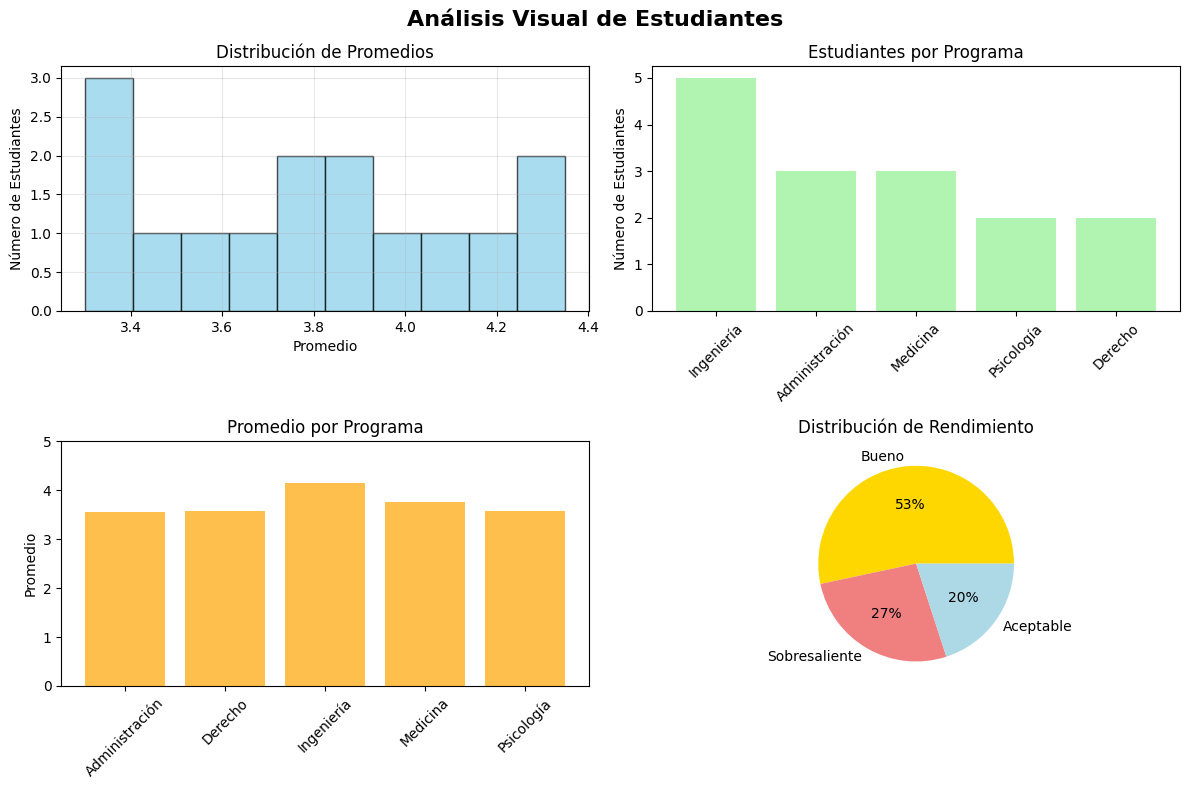

📊 Gráficos guardados en: resultados_etl_basico/analisis_visual.png


In [ ]:
# 4.1 Gráficos básicos para entender los datos
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Análisis Visual de Estudiantes', fontsize=16, fontweight='bold')

# Gráfico 1: Distribución de promedios
axes[0, 0].hist(df_completo['Promedio'], bins=10, color='skyblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Distribución de Promedios')
axes[0, 0].set_xlabel('Promedio')
axes[0, 0].set_ylabel('Número de Estudiantes')
axes[0, 0].grid(True, alpha=0.3)

# Gráfico 2: Estudiantes por programa
programa_counts = df_completo['Programa'].value_counts()
axes[0, 1].bar(programa_counts.index, programa_counts.values, color='lightgreen', alpha=0.7)
axes[0, 1].set_title('Estudiantes por Programa')
axes[0, 1].set_ylabel('Número de Estudiantes')
axes[0, 1].tick_params(axis='x', rotation=45)

# Gráfico 3: Promedio por programa
promedio_programa = df_completo.groupby('Programa')['Promedio'].mean()
axes[1, 0].bar(promedio_programa.index, promedio_programa.values, color='orange', alpha=0.7)
axes[1, 0].set_title('Promedio por Programa')
axes[1, 0].set_ylabel('Promedio')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_ylim(0, 5)

# Gráfico 4: Clasificación de rendimiento
rendimiento_counts = df_completo['Rendimiento'].value_counts()
colors = ['gold', 'lightcoral', 'lightblue', 'plum', 'lightgray']
axes[1, 1].pie(rendimiento_counts.values, labels=rendimiento_counts.index, 
               autopct='%1.0f%%', colors=colors[:len(rendimiento_counts)])
axes[1, 1].set_title('Distribución de Rendimiento')

plt.tight_layout()
plt.show()

# Guardar gráficos
archivo_graficos = os.path.join(carpeta_resultados, 'analisis_visual.png')
fig.savefig(archivo_graficos, dpi=300, bbox_inches='tight')
print(f"Gráficos guardados en: {archivo_graficos}")

## Paso 5: REPORTE FINAL

¡Resumen de todo lo que hicimos en nuestro ETL!

In [ ]:
# 5.1 Reporte final completo
print("REPORTE FINAL DEL ETL BÁSICO")
print("=" * 40)

print("\nRESUMEN DE DATOS:")
print(f"   • Total de estudiantes procesados: {len(df_completo)}")
print(f"   • Programas académicos: {df_completo['Programa'].nunique()}")
print(f"   • Ciudades representadas: {df_completo['Ciudad'].nunique()}")
print(f"   • Rango de edades: {df_completo['Edad'].min()} - {df_completo['Edad'].max()} años")

print("\nESTADÍSTICAS ACADÉMICAS:")
print(f"   • Promedio general: {df_completo['Promedio'].mean():.2f}")
print(f"   • Mejor promedio: {df_completo['Promedio'].max():.2f}")
print(f"   • Promedio más bajo: {df_completo['Promedio'].min():.2f}")
print(f"   • Estudiantes con rendimiento 'Excelente': {len(df_completo[df_completo['Rendimiento'] == 'Excelente'])}")

print("\nDATOS DESTACADOS:")
mejor_estudiante = df_completo.loc[df_completo['Promedio'].idxmax()]
print(f"   • Mejor estudiante: {mejor_estudiante['Nombre']} ({mejor_estudiante['Promedio']:.2f})")

# Programa con mejor promedio
mejor_programa = df_completo.groupby('Programa')['Promedio'].mean().idxmax()
promedio_programa = df_completo.groupby('Programa')['Promedio'].mean().max()
print(f"   • Programa con mejor promedio: {mejor_programa} ({promedio_programa:.2f})")

# Materia con mejor promedio general
materias = ['Matematicas', 'Programacion', 'Ingles', 'Fisica']
promedios_materias = df_completo[materias].mean()
mejor_materia = promedios_materias.idxmax()
print(f"   • Materia con mejor promedio: {mejor_materia} ({promedios_materias[mejor_materia]:.2f})")

print("\nARCHIVOS GENERADOS:")
archivos_creados = [
    'estudiantes_completo.csv',
    'reporte_por_programa.csv', 
    'reporte_por_ciudad.csv',
    'estudiantes_destacados.csv',
    'analisis_visual.png'
]

for archivo in archivos_creados:
    print(f"   {archivo}")

print("\n¡ETL COMPLETADO EXITOSAMENTE!")
print("\nLo que aprendiste hoy:")
print("   • Cómo importar y usar pandas")
print("   • Crear y manipular DataFrames")
print("   • Combinar datos de diferentes fuentes")
print("   • Calcular nuevas métricas")
print("   • Guardar datos en archivos CSV")
print("   • Crear visualizaciones básicas")
print("   • Generar reportes automáticos")

print("\n¡Felicitaciones por completar tu primer ETL!")

🎯 REPORTE FINAL DEL ETL BÁSICO

📊 RESUMEN DE DATOS:
   • Total de estudiantes procesados: 15
   • Programas académicos: 5
   • Ciudades representadas: 5
   • Rango de edades: 18 - 22 años

📈 ESTADÍSTICAS ACADÉMICAS:
   • Promedio general: 3.80
   • Mejor promedio: 4.35
   • Promedio más bajo: 3.30
   • Estudiantes con rendimiento 'Excelente': 0

🏆 DATOS DESTACADOS:
   • Mejor estudiante: Lucía Herrera (4.35)
   • Programa con mejor promedio: Ingeniería (4.15)
   • Materia con mejor promedio: Ingles (4.11)

💾 ARCHIVOS GENERADOS:
   ✅ estudiantes_completo.csv
   ✅ reporte_por_programa.csv
   ✅ reporte_por_ciudad.csv
   ✅ estudiantes_destacados.csv
   ✅ analisis_visual.png

🎉 ¡ETL COMPLETADO EXITOSAMENTE!

💡 Lo que aprendiste hoy:
   • Cómo importar y usar pandas
   • Crear y manipular DataFrames
   • Combinar datos de diferentes fuentes
   • Calcular nuevas métricas
   • Guardar datos en archivos CSV
   • Crear visualizaciones básicas
   • Generar reportes automáticos

🚀 ¡Felicitaciones 